In [51]:
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [52]:
dataset = pd.read_csv('datasets/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

In [53]:
# when looking at our dataset we see we need to do some feature scaling, our dependant 
# variable would dominate our independant variable. For this we create two different
# scalers, since we don't want to leak any information.
x_scaler = StandardScaler()
y_scaler = StandardScaler()
scaled_X = x_scaler.fit_transform(X)
scaled_y = y_scaler.fit_transform(y)

/Users/Alexander/Virtualenvs/ml-data-processing/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
# Here we use a Support Vector Regression model. default is uses a Gaussian kernel to
# determine our model. This means outliers have less of an impact on the final result.
# It's also possible to use the linear or polynimoal kernel, which yields the same results as
# LinearRegression, but with outliers being handled differently.
regressor = SVR()
regressor = regressor.fit(scaled_X, scaled_y)

/Users/Alexander/Virtualenvs/ml-data-processing/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


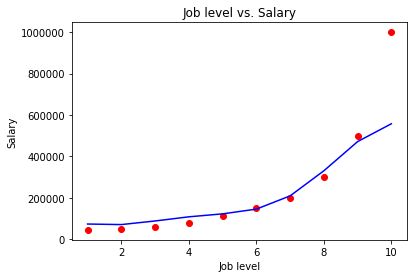

In [56]:
# now we plot the model to see the outcome. Since we used feature fitting it makes more sense
# to use inverse_transform here, so the graph uses the right values.
plot.scatter(X, y, color='red')
plot.plot(
    x_scaler.inverse_transform(scaled_X), 
    y_scaler.inverse_transform(regressor.predict(scaled_X)), 
    color='blue'
)
plot.xlabel('Job level')
plot.ylabel('Salary')
plot.title('Job level vs. Salary')
plot.show()